<a href="https://colab.research.google.com/github/HongSeongMo/Airbnb/blob/main/learning_plus_training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import os
 #path 하위에 dir_name 디렉토리 생성
def make_directory(path, dir_name):
    if dir_name not in os.listdir(path):
        os.mkdir(f'{path}/{dir_name}')

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
drive_path = 'drive/MyDrive'

#letuin 디렉토리 생성
make_directory(drive_path, 'letuin')

# letuin 디렉토리 내 airbnb 생성
make_directory(f'{drive_path}/letuin','airbnb')

# airbnb 디렉토리 내 data 생성
make_directory(f'{drive_path}/letuin/airbnb','data')

# airbnb 디렉토리 내 model 생성
make_directory(f'{drive_path}/letuin/airbnb','model')



구글드라이브에 데이터 다운받기


*   샘플데이터:2021-10-10/런던 에어비앤비 데이터
*   데이터 종류

   *listings:객실 목록

   *calendar:날짜별 판매정보

In [45]:
import requests

In [46]:
# url설정
url_listings = 'http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/listings.csv.gz'
url_calendar = 'http://data.insideairbnb.com/united-kingdom/england/london/2023-12-10/data/calendar.csv.gz'

# 파일명 설정
file_listings = 'listings_london_202312.csv.gz'
file_calendar = 'calendar_london_202312.csv.gz'

# path 설정
path = f'{drive_path}/letuin/airbnb/data'

In [47]:
# download listing data
with open(f'{path}/{file_listings}',"wb") as f:
    r = requests.get(url_listings)
    f.write(r.content)

# download calendar data
with open(f'{path}/{file_calendar}',"wb") as f:
    r = requests.get(url_calendar)
    f.write(r.content)

다운받은 데이터 확인


*   스키마:
*   listings:에어비앤비 객실 메타


*   calendar:날짜별 판매정보





In [48]:
# import pandas
import pandas as pd

# pandas 세팅
# display:소수점 자리수 세팅
pd.options.display.float_format = '{:.2f}'.format

listing 데이터

In [49]:
listing_df = pd.read_csv(f'{path}/{file_listings}', compression='gzip')

In [50]:
listing_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89


In [51]:
calendar_df = pd.read_csv(f'{path}/{file_calendar}', compression='gzip')

<ipython-input-51-278dd35f2f2b>:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df = pd.read_csv(f'{path}/{file_calendar}', compression='gzip')


In [52]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-12-10,f,NaN,NaN,1.00,29.00
1,13913,2023-12-11,t,NaN,NaN,1.00,29.00
2,13913,2023-12-12,t,NaN,NaN,1.00,29.00
3,13913,2023-12-13,t,NaN,NaN,1.00,29.00
4,13913,2023-12-14,t,NaN,NaN,1.00,29.00


에어비앤비 데이터 살펴보기

listing 데이터

.head

In [53]:
listing_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,198258,https://www.airbnb.com/rooms/198258,20231210055232,2023-12-10,city scrape,Rental unit in Barking · ★4.74 · 1 bedroom · 1...,NaN,"I live in Barking town centre, at one time the...",https://a0.muscache.com/pictures/airflow/Hosti...,967537,...,4.88,4.45,4.68,NaN,f,1,0,1,0,0.27
1,33332,https://www.airbnb.com/rooms/33332,20231210055232,2023-12-10,city scrape,"Home in St Margaret's, Isleworth · ★4.40 · 1 ...",NaN,Peaceful and friendly.,https://a0.muscache.com/pictures/miso/Hosting-...,144444,...,4.53,4.68,4.26,NaN,f,2,0,2,0,0.12
2,42010,https://www.airbnb.com/rooms/42010,20231210055232,2023-12-10,city scrape,Home in East Finchley · ★4.88 · 1 bedroom · 1 ...,NaN,We have a unique cinema called the Phoenix whi...,https://a0.muscache.com/pictures/airflow/Hosti...,157884,...,4.95,4.73,4.87,NaN,t,2,0,2,0,3.45
3,284603,https://www.airbnb.com/rooms/284603,20231210055232,2023-12-11,previous scrape,Rental unit in London · ★4.83 · 1 bedroom · 1 ...,NaN,NaN,https://a0.muscache.com/pictures/3246231/8e9b1...,1481851,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.04
4,89870,https://www.airbnb.com/rooms/89870,20231210055232,2023-12-10,city scrape,Rental unit in London · ★4.65 · 1 bedroom · 1 ...,NaN,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.91,4.73,4.50,NaN,f,3,2,1,0,0.89


.shape

In [54]:
listing_df.shape

(91778, 75)

.info

In [55]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91778 entries, 0 to 91777
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            91778 non-null  int64  
 1   listing_url                                   91778 non-null  object 
 2   scrape_id                                     91778 non-null  int64  
 3   last_scraped                                  91778 non-null  object 
 4   source                                        91778 non-null  object 
 5   name                                          91778 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         48999 non-null  object 
 8   picture_url                                   91767 non-null  object 
 9   host_id                                       91778 non-null 

calendar 데이터

In [56]:
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,13913,2023-12-10,f,NaN,NaN,1.00,29.00
1,13913,2023-12-11,t,NaN,NaN,1.00,29.00
2,13913,2023-12-12,t,NaN,NaN,1.00,29.00
3,13913,2023-12-13,t,NaN,NaN,1.00,29.00
4,13913,2023-12-14,t,NaN,NaN,1.00,29.00


In [57]:
calendar_df.shape

(33500650, 7)

In [58]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33500650 entries, 0 to 33500649
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.7+ GB


date 범위

In [59]:
date_start = calendar_df.date.min()
date_end = calendar_df.date.max()

print(f'시작 날짜: {date_start}')
print(f"종료 날짜: {date_end}")

시작 날짜: 2023-12-10
종료 날짜: 2024-12-23


unique key 확인

In [60]:
# unique key 확인을 위한 중복 체크
key = ['listing_id', 'date']

calendar_df[calendar_df.duplicated(key)]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights


한 객실의 calendar 데이터 샘플

In [61]:
calendar_df[calendar_df.listing_id==33332]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2920,33332,2023-12-10,t,NaN,NaN,2.00,21.00
3335,33332,2023-12-11,t,NaN,NaN,2.00,21.00
3336,33332,2023-12-12,t,NaN,NaN,2.00,21.00
3337,33332,2023-12-13,t,NaN,NaN,2.00,21.00
3338,33332,2023-12-14,t,NaN,NaN,2.00,21.00
...,...,...,...,...,...,...,...
4368,33332,2024-12-04,t,NaN,NaN,2.00,21.00
4652,33332,2024-12-05,t,NaN,NaN,2.00,21.00
4653,33332,2024-12-06,t,NaN,NaN,2.00,21.00
4654,33332,2024-12-07,t,NaN,NaN,2.00,21.00


객실별 등록날짜 count

In [62]:
listing_count = calendar_df.groupby('listing_id').count()['date'].reset_index(drop = False)

listing_count.head()

,listing_id,date
0,13913,365
1,15400,365
2,17402,365
3,24328,365
4,25123,365


In [63]:
# 리스팅별 날짜 count
listing_count.date.value_counts()

365    89708
366     2068
342        1
Name: date, dtype: int64

In [64]:
# 리스팅별 날짜 count 상대 비율
listing_count.date.value_counts(normalize=True)

365   0.98
366   0.02
342   0.00
Name: date, dtype: float64

avalilable days per listing

In [65]:
listing_available_count = calendar_df[calendar_df.available=='t'].groupby(['listing_id']).count()['date'].reset_index(drop=False)

In [66]:
listing_available_count.head()

,listing_id,date
0,13913,357
1,15400,18
2,17402,300
3,31036,246
4,33332,365


<Axes: >

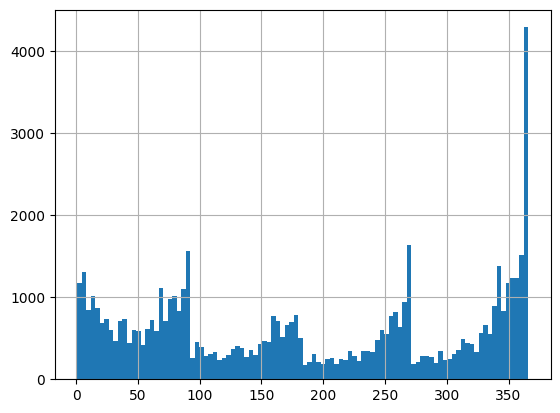

In [67]:
listing_available_count['date'].hist(bins=100)

예측 데이터 가공 : 1년간 매출

* price/adjusted_price

가격 필드 전처리

In [69]:
# adjusted_price into float
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace('$', '')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace(',', '')
calendar_df['adjusted_price'] = calendar_df['adjusted_price'].astype(float)

calendar_df['adjusted_price'].head()

<ipython-input-69-42f8368fccdc>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar_df['adjusted_price'] = calendar_df['adjusted_price'].str.replace('$', '')


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: adjusted_price, dtype: float64

객실매출 합산

In [70]:
# revenue by listing_id
revenue_df = calendar_df[calendar_df['available']=='f'].groupby('listing_id').adjusted_price.sum()

revenue_df.head()

listing_id
13913   0.00
15400   0.00
17402   0.00
24328   0.00
25123   0.00
Name: adjusted_price, dtype: float64

In [75]:
# reset index
revenue_df = revenue_df.reset_index(drop=False)
revenue_df.head()

,listing_id,adjusted_price
0,13913,0.00
1,15400,0.00
2,17402,0.00
3,24328,0.00
4,25123,0.00


In [76]:
# revenue column

revenue_df = revenue_df.rename(columns={"adjusted_price" : "revenue"})
revenue_df.head()

,listing_id,revenue
0,13913,0.00
1,15400,0.00
2,17402,0.00
3,24328,0.00
4,25123,0.00


.shape

In [77]:
# data size
revenue_df.shape

(89631, 2)

.describe

In [78]:
# revenue 기술통계(단위 : 달러)
revenue_df.revenue.describe()

count     89631.00
mean         62.96
std        6947.62
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     1401522.00
Name: revenue, dtype: float64

.hist

<Axes: >

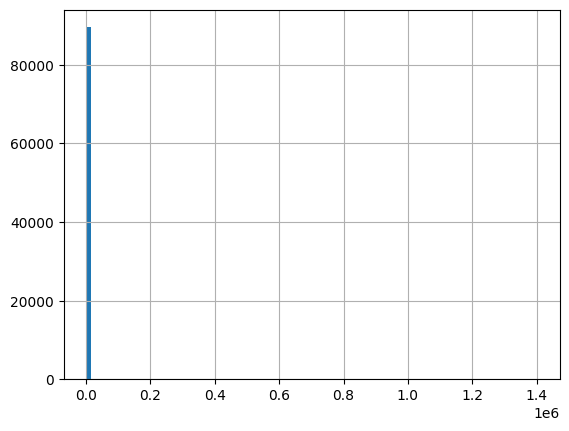

In [79]:
# revenue 히스토그램
revenue_df.revenue.hist(bins=100)

<Axes: >

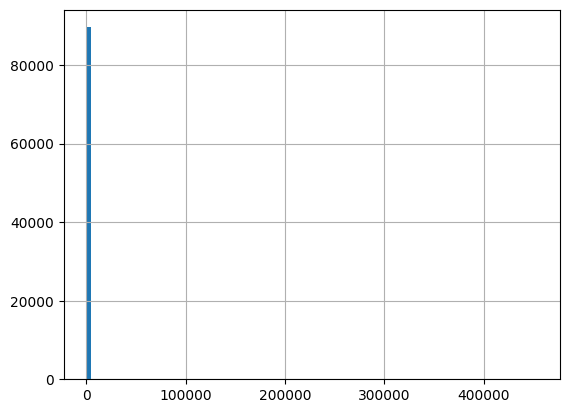

In [80]:
# revenue 히스토그램 : 아웃라이어 제외 후
revenue_df[revenue_df.revenue <5*10**5].revenue.hist(bins=100)

In [81]:
# 매출이 0인 객실수
revenue_df[revenue_df.revenue==0].shape

(89612, 2)

<Axes: >

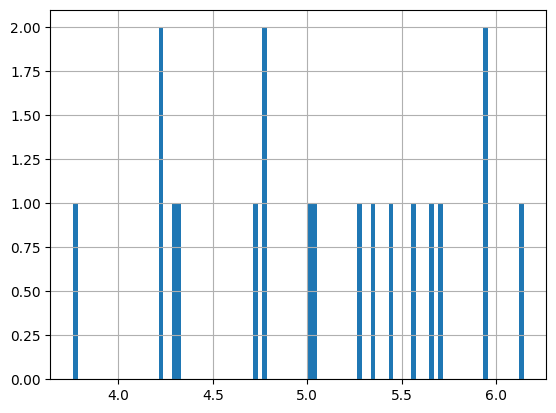

In [82]:
# revenue 히스토그램 : 로그변환 후
import numpy as np

np.log10(revenue_df[revenue_df.revenue > 0].revenue).hist(bins=100)